# Predict Magnetic Structure of BaOsO3

In [90]:
import re
import copy
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from PIL import Image

## 1. Original data

In [91]:
df0 = pd.read_csv('output1/highsym.csv')
df0 = df0.drop(df0.loc[:, 'eG0.1':'wG11.1'], axis=1)

e_list = [col for col in list(df0) if re.match('e', col)]
w_list = [col for col in list(df0) if re.match('w', col)]
c_list = [col for col in list(df0) if col not in (e_list + w_list)]
for e in e_list: df0.loc[:, e] = df0.loc[:, e] - df0.loc[:, 'dntop']
    
df0

,JU,SOC,type,N,U,dntop,gap,eG0,eG1,eG2,...,wR2,wR3,wR4,wR5,wR6,wR7,wR8,wR9,wR10,wR11
0,0.0,0.0,c,10.2,9.0,50.034453,0.000178,-10.310644,-10.310644,-10.310644,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.712502,0.712502
1,0.0,0.0,c,10.4,9.0,50.111401,0.000531,-9.488760,-9.488760,-9.488760,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.733990,0.733990
2,0.0,0.0,c,10.2,8.0,45.039853,0.001265,-9.420893,-9.420893,-9.420893,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.734231,0.734231
3,0.0,0.0,a,10.2,9.0,49.016489,0.000020,-9.295532,-9.295532,-9.295532,...,0.000000,0.000000,0.475519,0.475519,1.000000,1.000000,1.000000,1.000000,0.524481,0.524481
4,0.0,0.0,a,10.4,9.0,49.619458,0.001141,-8.994084,-8.994084,-8.994084,...,0.000000,0.000000,0.472448,0.472448,1.000000,1.000000,1.000000,1.000000,0.527552,0.527552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7075,0.3,0.0,a,0.2,4.0,3.367212,0.000021,-0.419944,-0.419944,-0.415627,...,0.000131,0.000131,0.008074,0.008074,0.999869,0.999869,0.999869,0.999869,0.991926,0.991926
7076,0.3,0.0,a,0.2,3.0,3.336947,0.000113,-0.421356,-0.421356,-0.420492,...,0.000067,0.000067,0.004291,0.004291,0.999933,0.999933,0.999933,0.999933,0.995709,0.995709
7077,0.3,0.0,a,0.2,2.0,3.304019,0.000045,-0.418810,-0.418810,-0.418810,...,0.000023,0.000023,0.001563,0.001563,0.999977,0.999977,0.999977,0.999977,0.998437,0.998437
7078,0.3,0.0,a,0.2,1.0,3.270638,0.000000,-0.418863,-0.418863,-0.418863,...,0.000002,0.000002,0.000132,0.000132,0.999998,0.999998,0.999998,0.999998,0.999868,0.999868


## 2. Visualized histogram

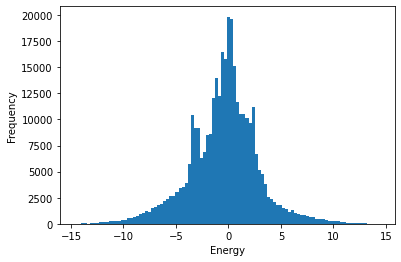

In [106]:
bins = 100
info = plt.hist(df0.loc[:, e_list].values.flatten(), bins=bins)
e_range = [min(info[1]), max(info[1])]

plt.xlabel('Energy')
plt.ylabel('Frequency')
plt.show()

JU             0.0
SOC            0.0
type             a
N              6.8
U              9.0
dntop    33.461245
gap       0.000047
Name: 90, dtype: object


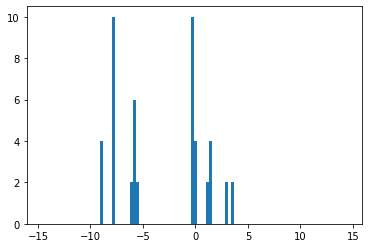

In [107]:
idx = 90
plt.hist(df0.loc[idx, e_list], bins=bins, range=e_range)
print(df0.loc[idx, c_list])
plt.show()

## 3. Generated histogram data for training
unfolding weight is included

In [124]:
col_list = ['h%d' % i for i in range(bins)]
col_list.insert(0, 'U')
col_list.insert(0, 'type')
df = pd.DataFrame()

for i in range(len(df0)):
    info = np.histogram(df0.loc[i, e_list], bins=bins, range=e_range, weights=df0.loc[i, w_list])
    data = pd.DataFrame([np.insert(info[0], 0, [df0.loc[i, 'type'], df0.loc[i, 'U']])], columns=col_list)
    df = pd.concat([df, data], sort=False)

df = df.reset_index(drop=True)
df

,type,U,h0,h1,h2,h3,h4,h5,h6,h7,...,h90,h91,h92,h93,h94,h95,h96,h97,h98,h99
0,c,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,c,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,c,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,a,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,a,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7075,a,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7076,a,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7077,a,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7078,a,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 4. Functions for machine learning

In [112]:
def DrawImportances(rf, feature_names):
    importances = pd.Series(rf.feature_importances_, index=feature_names)
    importances_w = importances.copy()
    for fn in feature_names:
        if not re.match('w', fn): importances_w[fn] = 0

    fig, ax = plt.subplots(figsize=(16, 6))
    importances.plot.bar(ax=ax, color='tab:blue')
    importances_w.plot.bar(ax=ax, color='tab:orange')
    ax.set_xticklabels(feature_names)
    ax.set_title("Feature importances")
    fig.tight_layout()
    plt.show()

## 5. Random forest

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = df.drop(['type'], axis=1).values
y = df['type'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

rf = RandomForestClassifier(criterion='gini', random_state=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

Accuracy : 0.832
Precision : 0.832
Recall : 0.832


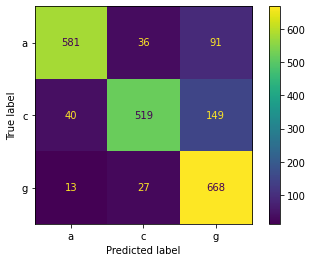

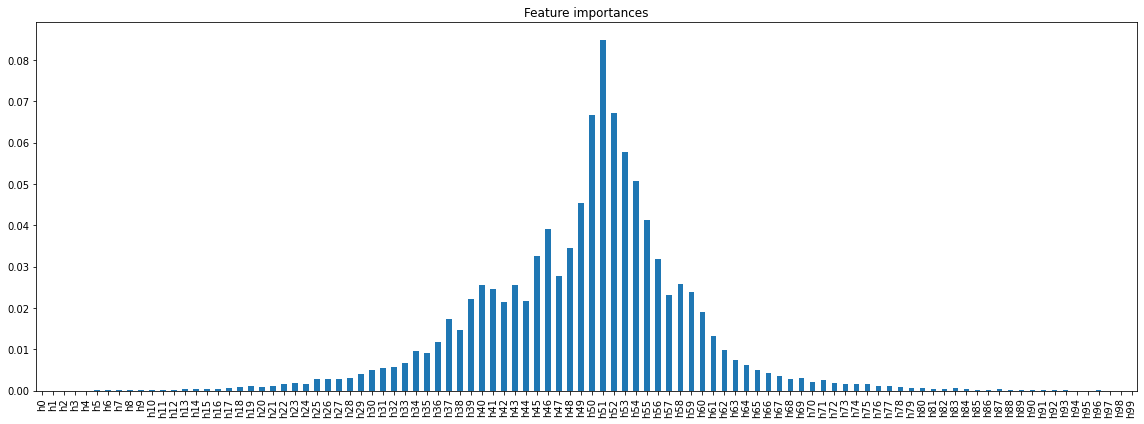

In [111]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay

print('Accuracy : %.3f\nPrecision : %.3f\nRecall : %.3f' %\
      (accuracy_score(y_test, y_pred),\
       precision_score(y_test, y_pred, average='micro'),\
       recall_score(y_test, y_pred, average='micro')))

feature_names = list(df.columns)
feature_names.remove('type')

ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)
DrawImportances(rf, feature_names)

## 6. Logistic regression

In [114]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

sc_std = StandardScaler()
sc_mm  = MinMaxScaler()

X_std = sc_std.fit_transform(X)
X_mm  = sc_mm.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, stratify=y, random_state=1)

In [115]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, random_state=1)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

Accuracy : 0.500
Precision : 0.500
Recall : 0.500


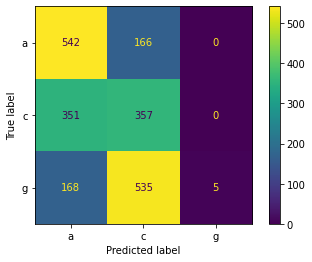

In [119]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay

print('Accuracy : %.3f\nPrecision : %.3f\nRecall : %.3f' %\
      (accuracy_score(y_test, y_pred),\
       precision_score(y_test, y_pred, average='micro'),\
       recall_score(y_test, y_pred, average='micro')))

feature_names = list(df.columns)
feature_names.remove('type')

ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)